In [ ]:
import pandas as pd
import numpy as np

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/기술 세미나/3차/credit_risk_dataset.csv')

# 독일 신용 위험 데이터
- Age : 나이
- Sex : 성별
- Job : 0-비숙련 비거주 , 1- 비숙련 거주, 2-숙련, 3-고도로 숙련
- Housing : Own-자가, rent-렌트, free-무료
- Saving accounts : 저축계좌금액
- Checking account : 자주사용하는 계좌금액
- Credit amount : 대출금액
- Duration : 대출 기간
- Purpose : 대출목적

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000,PERSONAL,D,35000,16.020,1,0.590,Y,3
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,N,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,N,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,N,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.000,PERSONAL,C,5800,13.160,0,0.110,N,30
32577,54,120000,MORTGAGE,4.000,PERSONAL,A,17625,7.490,0,0.150,N,19
32578,65,76000,RENT,3.000,HOMEIMPROVEMENT,B,35000,10.990,1,0.460,N,28
32579,56,150000,MORTGAGE,5.000,PERSONAL,B,15000,11.480,0,0.100,N,26


In [ ]:
print(credit.shape)
credit = credit.drop_duplicates()

(32581, 12)


In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000,PERSONAL,D,35000,16.020,1,0.590,Y,3
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,N,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,N,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,N,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.000,PERSONAL,C,5800,13.160,0,0.110,N,30
32577,54,120000,MORTGAGE,4.000,PERSONAL,A,17625,7.490,0,0.150,N,19
32578,65,76000,RENT,3.000,HOMEIMPROVEMENT,B,35000,10.990,1,0.460,N,28
32579,56,150000,MORTGAGE,5.000,PERSONAL,B,15000,11.480,0,0.100,N,26


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
# #불필요한 컬럼 삭제
credit.drop(['cb_person_default_on_file'], axis = 1, inplace = True)

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,4
5,21,9900,OWN,2.000,VENTURE,A,2500,7.140,1,0.250,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.000,PERSONAL,C,5800,13.160,0,0.110,30
32577,54,120000,MORTGAGE,4.000,PERSONAL,A,17625,7.490,0,0.150,19
32578,65,76000,RENT,3.000,HOMEIMPROVEMENT,B,35000,10.990,1,0.460,28
32579,56,150000,MORTGAGE,5.000,PERSONAL,B,15000,11.480,0,0.100,26


In [ ]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000
mean,27.651,64462.400,4.766,9625.659,11.037,0.217,0.170,5.762
std,6.045,37602.547,4.012,6292.283,3.229,0.412,0.106,3.992
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.010,2.000
25%,23.000,39000.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55260.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79700.000,7.000,12375.000,13.480,0.000,0.230,8.000
max,67.000,300000.000,31.000,35000.000,23.220,1.000,0.830,30.000


Text(0.5, 0, 'Attributes')

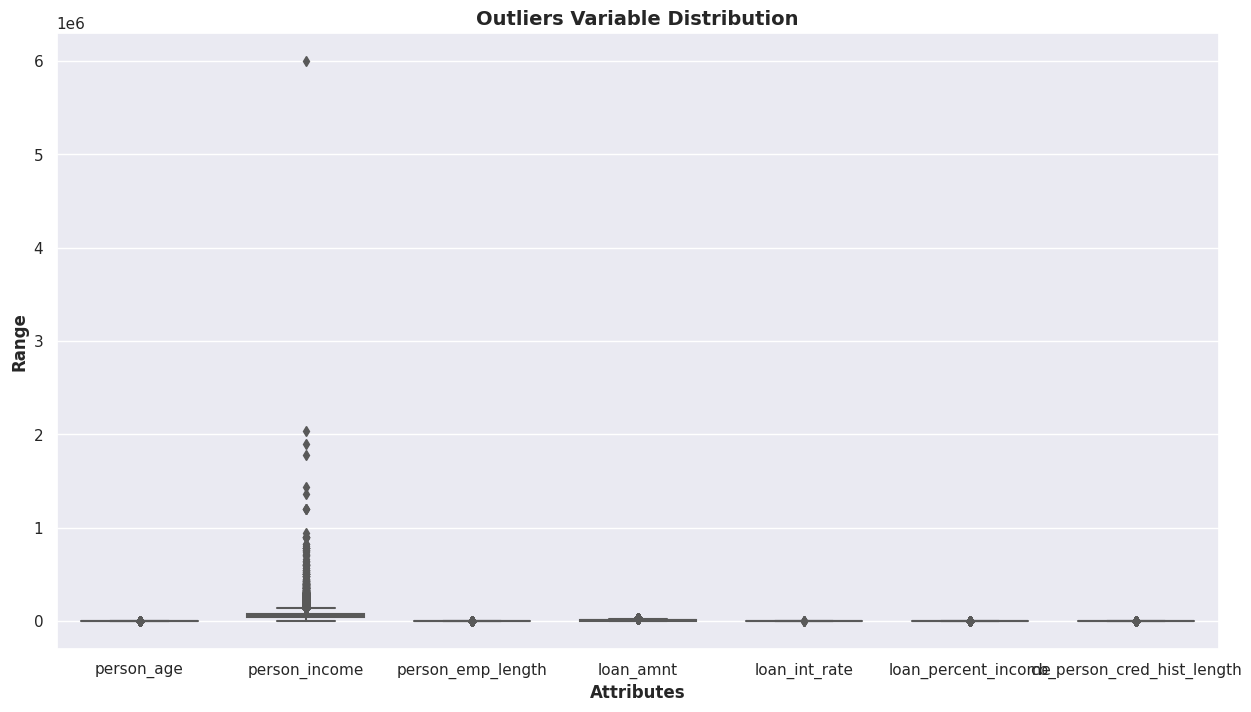

In [ ]:
# 이상치 분석
import matplotlib.pyplot as plt
attributes = ['person_age','person_income','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
plt.rcParams['figure.figsize'] = [15,8]
sns.boxplot(data = credit[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
Q1 = credit.person_age.quantile(0.05)
Q3 = credit.person_age.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_age >= Q1 - 1.5*IQR) & (credit.person_age <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = credit.person_income.quantile(0.05)
Q3 = credit.person_income.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_income >= Q1 - 1.5*IQR) & (credit.person_income <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = credit.person_emp_length.quantile(0.05)
Q3 = credit.person_emp_length.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.person_emp_length >= Q1 - 1.5*IQR) & (credit.person_emp_length <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_amnt.quantile(0.05)
Q3 = credit.loan_amnt.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_amnt >= Q1 - 1.5*IQR) & (credit.loan_amnt <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_int_rate.quantile(0.05)
Q3 = credit.loan_int_rate.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_int_rate >= Q1 - 1.5*IQR) & (credit.loan_int_rate <= Q3 + 1.5*IQR)]
#
Q1 = credit.loan_percent_income.quantile(0.05)
Q3 = credit.loan_percent_income.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.loan_percent_income >= Q1 - 1.5*IQR) & (credit.loan_percent_income <= Q3 + 1.5*IQR)]
#
Q1 = credit.cb_person_cred_hist_length.quantile(0.05)
Q3 = credit.cb_person_cred_hist_length.quantile(0.95)
IQR = Q3 - Q1
credit = credit[(credit.cb_person_cred_hist_length >= Q1 - 1.5*IQR) & (credit.cb_person_cred_hist_length <= Q3 + 1.5*IQR)]

In [ ]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000
mean,27.651,64462.400,4.766,9625.659,11.037,0.217,0.170,5.762
std,6.045,37602.547,4.012,6292.283,3.229,0.412,0.106,3.992
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.010,2.000
25%,23.000,39000.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55260.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79700.000,7.000,12375.000,13.480,0.000,0.230,8.000
max,67.000,300000.000,31.000,35000.000,23.220,1.000,0.830,30.000


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,4
5,21,9900,OWN,2.000,VENTURE,A,2500,7.140,1,0.250,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.000,PERSONAL,C,5800,13.160,0,0.110,30
32577,54,120000,MORTGAGE,4.000,PERSONAL,A,17625,7.490,0,0.150,19
32578,65,76000,RENT,3.000,HOMEIMPROVEMENT,B,35000,10.990,1,0.460,28
32579,56,150000,MORTGAGE,5.000,PERSONAL,B,15000,11.480,0,0.100,26


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
credit['person_home_ownership'] = label_encoder.fit_transform(credit['person_home_ownership'])
credit['loan_intent'] = label_encoder.fit_transform(credit['loan_intent'])
credit['loan_grade'] = label_encoder.fit_transform(credit['loan_grade'])

In [ ]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
1,21,9600,2,5.000,1,1,1000,11.140,0,0.100,2
2,25,9600,0,1.000,3,2,5500,12.870,1,0.570,3
3,23,65500,3,4.000,3,2,35000,15.230,1,0.530,2
4,24,54400,3,8.000,3,2,35000,14.270,1,0.550,4
5,21,9900,2,2.000,5,0,2500,7.140,1,0.250,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,2,5800,13.160,0,0.110,30
32577,54,120000,0,4.000,4,0,17625,7.490,0,0.150,19
32578,65,76000,3,3.000,2,1,35000,10.990,1,0.460,28
32579,56,150000,0,5.000,4,1,15000,11.480,0,0.100,26


In [ ]:
credit_2 = credit[['person_age', 'person_income','person_home_ownership',
                 'person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate'
                 ,'loan_percent_income','cb_person_cred_hist_length','loan_status']]

In [ ]:
credit_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
1,21,9600,2,5.000,1,1,1000,11.140,0.100,2,0
2,25,9600,0,1.000,3,2,5500,12.870,0.570,3,1
3,23,65500,3,4.000,3,2,35000,15.230,0.530,2,1
4,24,54400,3,8.000,3,2,35000,14.270,0.550,4,1
5,21,9900,2,2.000,5,0,2500,7.140,0.250,2,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.000,4,2,5800,13.160,0.110,30,0
32577,54,120000,0,4.000,4,0,17625,7.490,0.150,19,0
32578,65,76000,3,3.000,2,1,35000,10.990,0.460,28,1
32579,56,150000,0,5.000,4,1,15000,11.480,0.100,26,0


In [ ]:
credit_2.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000,28493.000
mean,27.651,64462.400,1.684,4.766,2.531,1.227,9625.659,11.037,0.170,5.762,0.217
std,6.045,37602.547,1.434,4.012,1.730,1.170,6292.283,3.229,0.106,3.992,0.412
min,20.000,4000.000,0.000,0.000,0.000,0.000,500.000,5.420,0.010,2.000,0.000
25%,23.000,39000.000,0.000,2.000,1.000,0.000,5000.000,7.900,0.090,3.000,0.000
50%,26.000,55260.000,3.000,4.000,3.000,1.000,8000.000,10.990,0.150,4.000,0.000
75%,30.000,79700.000,3.000,7.000,4.000,2.000,12375.000,13.480,0.230,8.000,0.000
max,67.000,300000.000,3.000,31.000,5.000,6.000,35000.000,23.220,0.830,30.000,1.000


In [ ]:
# credit['loan_grade'].unique()

In [ ]:
# credit_1 = pd.get_dummies(credit['loan_grade'], prefix='class')

In [ ]:
# credit_1

In [ ]:
# credit_2 = pd.concat([credit, credit_1], axis=1)

In [ ]:
# credit_2

In [ ]:
# credit_2.drop(['loan_grade'], axis = 1, inplace = True)

In [ ]:
# credit_2

#데이터 셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from  sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

credit_2_onehot_minmax = credit_2.copy() # 원본 복사
credit_2_onehot_minmax = pd.DataFrame(minmax.fit_transform(credit_2_onehot_minmax),
                            columns=credit_2_onehot_minmax.columns)

X = credit_2_onehot_minmax.drop(['loan_status'], axis=1)
y = credit_2_onehot_minmax.loc[:, ['loan_status']]

# sklearn의 train_test_split을 가지고 오셔서 훈련용 80%, 검증용 20%로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((22794, 10), (22794, 1), (5699, 10), (5699, 1))

In [ ]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.021,0.019,0.667,0.161,0.200,0.167,0.014,0.321,0.110,0.000
1,0.106,0.019,0.000,0.032,0.600,0.333,0.145,0.419,0.683,0.036
2,0.064,0.208,1.000,0.129,0.600,0.333,1.000,0.551,0.634,0.000
3,0.085,0.170,1.000,0.258,0.600,0.333,1.000,0.497,0.659,0.071
4,0.021,0.020,0.667,0.065,1.000,0.000,0.058,0.097,0.293,0.000
...,...,...,...,...,...,...,...,...,...,...
28488,0.787,0.166,0.000,0.032,0.800,0.333,0.154,0.435,0.122,1.000
28489,0.723,0.392,0.000,0.129,0.800,0.000,0.496,0.116,0.171,0.607
28490,0.957,0.243,1.000,0.097,0.400,0.167,1.000,0.313,0.549,0.929
28491,0.766,0.493,0.000,0.161,0.800,0.167,0.420,0.340,0.110,0.857


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=42)

In [ ]:
# first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
# second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
# first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
# second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [ ]:
# X_train1 = first_cluster_train
# y_train1 = y_train[y_train.Clusters ==0]['Risk']

In [ ]:
# X_test1 = first_cluster_test
# y_test1 = y_test[y_test.Clusters == 0]['Risk']

In [ ]:
# X_train2 = second_cluster_train
# y_train2 = y_train[y_train.Clusters == 1]['Risk']
# X_test2 = second_cluster_test
# y_test2 = y_test[y_test.Clusters == 1]['Risk']

# 딥러닝 채무불이행 추정

In [ ]:
model = []

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(10,)))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
# 모델이 일하는 방법을 정의해줍니다 compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델에게 실제 데이터를 학습시킵니다 fit
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.25 )

Epoch 1/50
1069/1069 [==============================] - 8s 3ms/step - loss: 0.3040 - accuracy: 0.8871 - val_loss: 0.2979 - val_accuracy: 0.8900
Epoch 2/50
1069/1069 [==============================] - 3s 3ms/step - loss: 0.3010 - accuracy: 0.8884 - val_loss: 0.2959 - val_accuracy: 0.8919
Epoch 3/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.2991 - accuracy: 0.8900 - val_loss: 0.2956 - val_accuracy: 0.8884
Epoch 4/50
1069/1069 [==============================] - 4s 4ms/step - loss: 0.2979 - accuracy: 0.8903 - val_loss: 0.2971 - val_accuracy: 0.8881
Epoch 5/50
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2955 - accuracy: 0.8916 - val_loss: 0.2988 - val_accuracy: 0.8931
Epoch 6/50
1069/1069 [==============================] - 3s 3ms/step - loss: 0.2941 - accuracy: 0.8912 - val_loss: 0.2901 - val_accuracy: 0.8933
Epoch 7/50
1069/1069 [==============================] - 5s 5ms/step - loss: 0.2926 - accuracy: 0.8930 - val_loss: 0.2901 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

179/179 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.9102


[0.25919750332832336, 0.9101596474647522]

In [ ]:
result = model.predict(X_test)

179/179 [==============================] - 0s 2ms/step


In [ ]:
result_1 = pd.DataFrame(result)
result_1['결정값'] = result_1[0].apply(lambda x: '가능' if x >= 0.5 else '불가능')
result_1

,0,결정값
0,0.037,불가능
1,0.142,불가능
2,0.022,불가능
3,0.163,불가능
4,0.184,불가능
...,...,...
5694,0.162,불가능
5695,0.037,불가능
5696,0.152,불가능
5697,0.105,불가능


In [ ]:
y_test

,loan_status
3710,0.000
25238,0.000
1684,0.000
18152,0.000
9299,0.000
...,...
11866,0.000
20891,0.000
5673,0.000
5262,0.000


In [ ]:
y_test_idx = y_test.reset_index(drop=True)

In [ ]:
y_test_idx

,loan_status
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
5694,0.000
5695,0.000
5696,0.000
5697,0.000


In [ ]:
result_df_4 = pd.concat([result_1, y_test_idx], axis=1)

In [ ]:
result_df_4

,0,결정값,loan_status
0,0.037,불가능,0.000
1,0.142,불가능,0.000
2,0.022,불가능,0.000
3,0.163,불가능,0.000
4,0.184,불가능,0.000
...,...,...,...
5694,0.162,불가능,0.000
5695,0.037,불가능,0.000
5696,0.152,불가능,0.000
5697,0.105,불가능,0.000


In [ ]:
result_df_4.sample(n=50)

,0,결정값,loan_status
4006,0.988,가능,1.000
4338,0.112,불가능,0.000
5223,0.993,가능,1.000
5107,0.140,불가능,0.000
5075,0.178,불가능,0.000
4391,1.000,가능,1.000
375,0.078,불가능,0.000
1827,1.000,가능,1.000
3535,0.158,불가능,0.000
3919,0.029,불가능,0.000


In [ ]:
average_values = [27.651, 64462.400, 1.684, 4.766, 2.531, 1.227, 9625.659, 11.037, 0.170, 5.762]

# Define the margin of error (10%)
margin_of_error = 0.9

# Generate random data with the specified average values and margin of error
num_samples = 100  # Number of samples in the DataFrame (you can adjust this as needed)
random_data = []
for avg_value in average_values:
    lower_bound = avg_value - (avg_value * margin_of_error)
    upper_bound = avg_value + (avg_value * margin_of_error)
    random_column_data = np.random.uniform(lower_bound, upper_bound, num_samples)
    random_data.append(random_column_data)

# Create the DataFrame
columns = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent',
           'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
df = pd.DataFrame(np.array(random_data).T, columns=columns)

# Display the DataFrame
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,40.245,71397.974,1.107,5.880,3.156,2.134,13477.069,17.141,0.201,8.174
1,36.188,44009.182,2.110,2.996,2.820,1.653,16828.418,8.466,0.299,10.694
2,41.282,26140.692,2.697,7.719,1.908,0.324,5496.296,2.794,0.193,1.981
3,39.974,104928.796,2.200,0.691,3.119,1.151,11618.603,6.269,0.281,1.469
4,40.520,60520.370,1.435,2.767,2.585,1.336,7517.129,5.918,0.242,4.204
...,...,...,...,...,...,...,...,...,...,...
95,18.117,56915.586,2.232,8.105,2.243,0.260,8676.876,14.435,0.091,4.122
96,17.294,65213.168,2.979,7.421,2.460,0.139,16257.942,11.566,0.318,5.651
97,10.203,31551.070,0.704,6.606,0.468,1.160,14089.474,19.643,0.083,4.795
98,15.991,58484.024,1.132,3.127,3.677,0.421,16186.694,16.071,0.249,3.946


In [ ]:
from  sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

df_onehot_minmax = df.copy() # 원본 복사
df_onehot_minmax = pd.DataFrame(minmax.fit_transform(df_onehot_minmax),
                            columns=df_onehot_minmax.columns)

In [ ]:
#함수를 통과

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,40.245,71397.974,1.107,5.880,3.156,2.134,13477.069,17.141,0.201,8.174
1,36.188,44009.182,2.110,2.996,2.820,1.653,16828.418,8.466,0.299,10.694
2,41.282,26140.692,2.697,7.719,1.908,0.324,5496.296,2.794,0.193,1.981
3,39.974,104928.796,2.200,0.691,3.119,1.151,11618.603,6.269,0.281,1.469
4,40.520,60520.370,1.435,2.767,2.585,1.336,7517.129,5.918,0.242,4.204
...,...,...,...,...,...,...,...,...,...,...
95,18.117,56915.586,2.232,8.105,2.243,0.260,8676.876,14.435,0.091,4.122
96,17.294,65213.168,2.979,7.421,2.460,0.139,16257.942,11.566,0.318,5.651
97,10.203,31551.070,0.704,6.606,0.468,1.160,14089.474,19.643,0.083,4.795
98,15.991,58484.024,1.132,3.127,3.677,0.421,16186.694,16.071,0.249,3.946


In [ ]:
result_2 = model.predict(df_onehot_minmax)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

original_data = scaler.inverse_transform(result_2)

ValueError: ignored

In [ ]:
gs.fit(X_train, y_train, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/loc

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = 0.2,
                        verbose = 0,
                        batch_size = 10,
                        epochs = 50)
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

<ipython-input-165-2d613e8132f2>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = DL_risk,


2/2 [==============================] - 0s 4ms/step
DL_ROC_AUC is 0.7251


In [ ]:
best_keras_model = model.model

In [ ]:
best_keras_model.save('my_keras_model.h5')

In [ ]:

data_test = {
    'Age': [24, 0, 42, 36],
    'Job': [0, 1, 2, 3],
    'Credit amount': [2000, 10000000, 4000, 1000],
    'Duration': [6, 12, 24, 36]
}
df_test = pd.DataFrame(data_test)

In [ ]:
df_test

,Age,Job,Credit amount,Duration
0,24,0,2000,6
1,0,1,10000000,12
2,42,2,4000,24
3,36,3,1000,36


In [ ]:
model.predict(df_test)

1/1 [==============================] - 0s 46ms/step


array([[0],
       [0],
       [0],
       [0]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

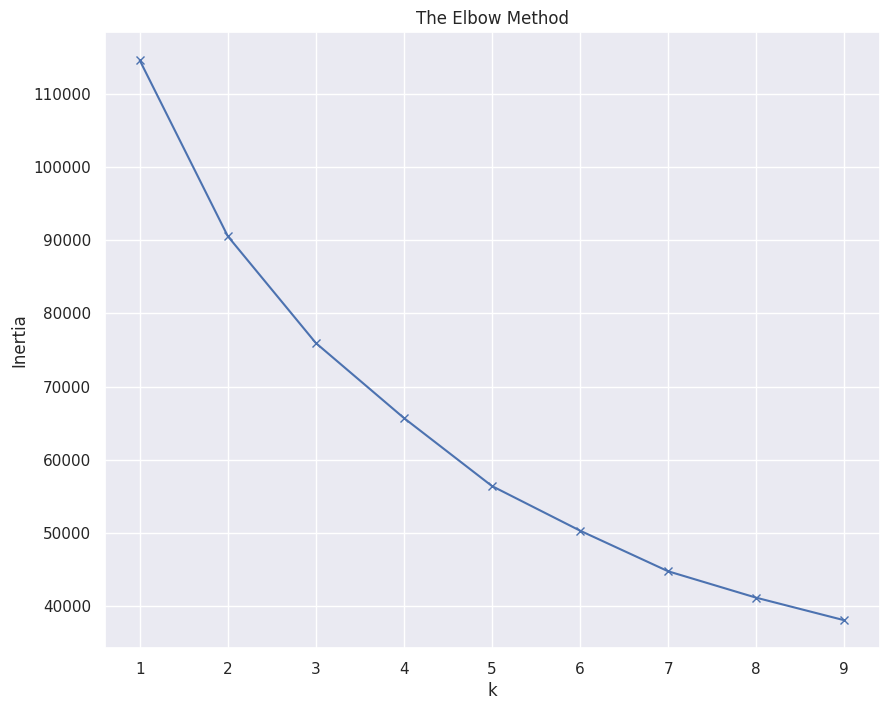

In [ ]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)
plt.plot(range(1,10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [ ]:
# 실루엣 분석
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_credit)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(scaled_credit, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.33325286050163194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.3231572155042908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3188373381203382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.31853730737650837


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.31840144966548906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.24750775647505338


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.23231229569009096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

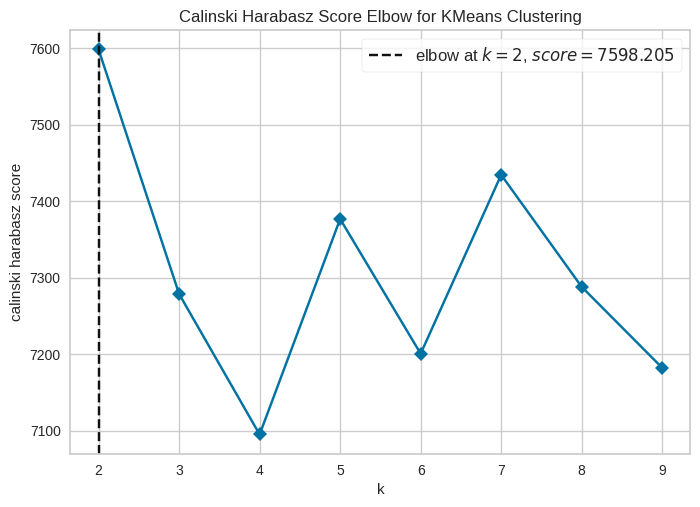

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from yellowbrick.cluster.elbow import KElbowVisualizer
from yellowbrick.cluster import kelbow_visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)
visualizer.fit(scaled_credit)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Age vs Duration')

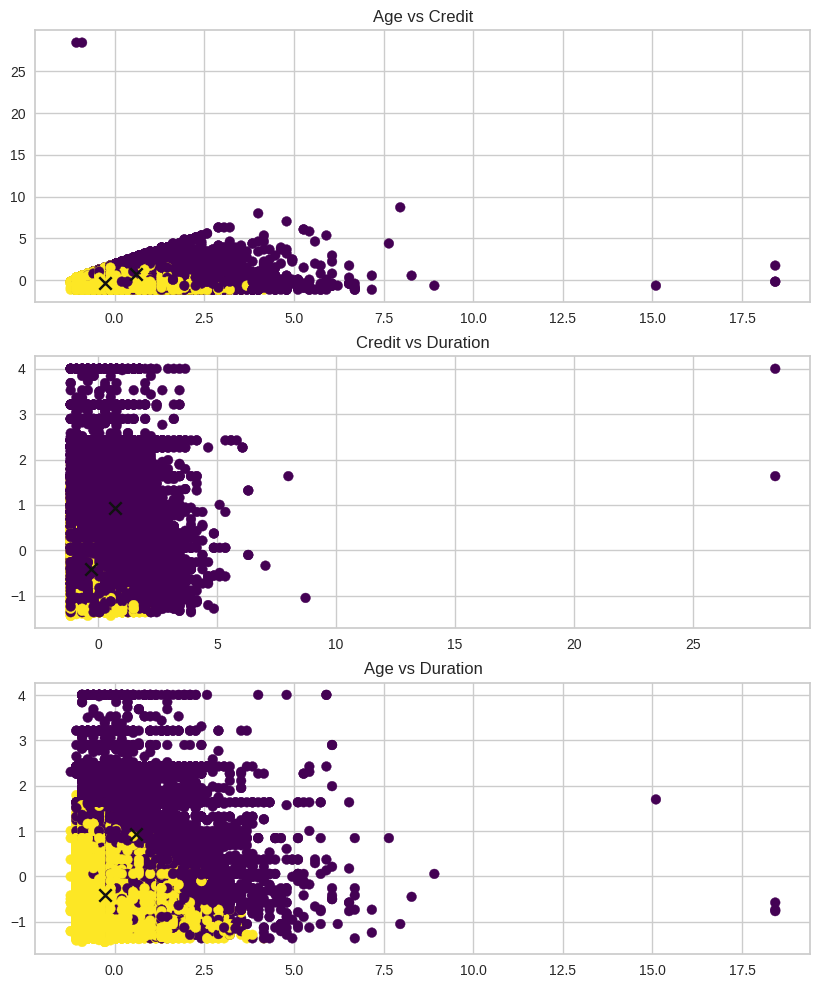

In [ ]:
#이건 뭔가 이상한데
#a j c d
plt.figure(figsize = (10,12))
plt.subplot(311)
plt.scatter(scaled_credit[:,0], scaled_credit[:,2],c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], s = 80, marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:,2], scaled_credit[:,3],c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], s = 80, marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:,0], scaled_credit[:,3],c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,3], s = 80, marker= 'x', color = 'k')
plt.title('Age vs Duration')

In [ ]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [ ]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [ ]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [ ]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [ ]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [ ]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

good    131
bad     108
Name: Risk, dtype: int64

In [ ]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

good    569
bad     192
Name: Risk, dtype: int64

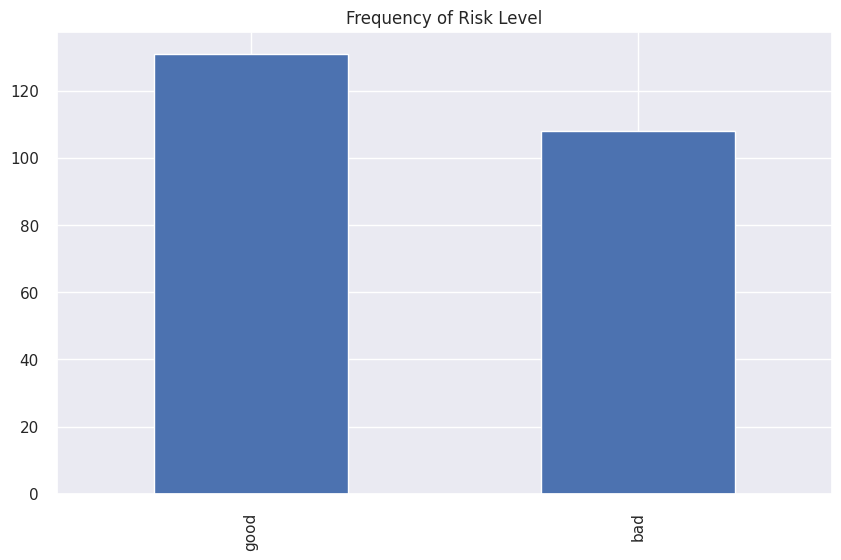

In [ ]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

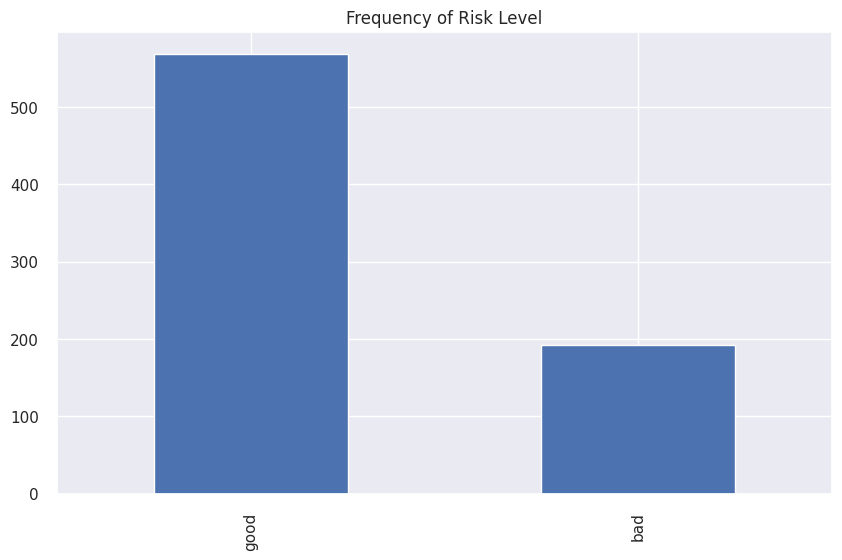

In [ ]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

#데이터 셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [ ]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [ ]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters ==0]['Risk']

In [ ]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']

In [ ]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']

# 딥러닝 채무불이행 추정

In [ ]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal',
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal',
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal',
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':[10,50,100], 'epochs':[50,100,150], 'dropout_rate':[0.2,0.4]}
model = KerasClassifier(build_fn = DL_risk)

<ipython-input-119-b49d5491fc95>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = DL_risk)


In [ ]:
gs = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'roc_auc')

In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

2/2 [==============================] - 0s 4ms/step
Best hyperparameters for first cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = 0.2,
                        verbose = 0,
                        batch_size = 10,
                        epochs = 50)
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

<ipython-input-165-2d613e8132f2>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = DL_risk,


2/2 [==============================] - 0s 4ms/step
DL_ROC_AUC is 0.7251


In [ ]:
best_keras_model = model.model

In [ ]:
best_keras_model.save('my_keras_model.h5')

In [ ]:

data_test = {
    'Age': [24, 0, 42, 36],
    'Job': [0, 1, 2, 3],
    'Credit amount': [2000, 10000000, 4000, 1000],
    'Duration': [6, 12, 24, 36]
}
df_test = pd.DataFrame(data_test)

In [ ]:
df_test

,Age,Job,Credit amount,Duration
0,24,0,2000,6
1,0,1,10000000,12
2,42,2,4000,24
3,36,3,1000,36
